## Phân nhóm chữ viết tay
### Bài toán: Giả sử rằng chúng ta không biết nhãn của các chữ số này, chúng ta muốn phân nhóm các bức ảnh gần giống nhau về một nhóm.

In [11]:
# %load display_network.py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [12]:
from display_network import *     # display multiple photos at once 
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize


In [21]:

# mndata = MNIST('MNIST/')
# mndata.load_testing()
# X = mndata.test_images

# print(X)
    

    
    
    

## Object Segmentation 
### Bài toán xử lý ảnh khác: tách vật thể.

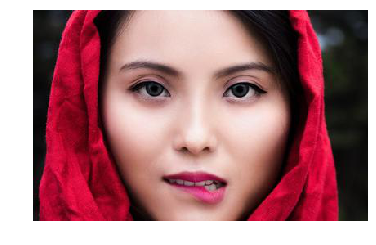

numpy.ndarray

In [35]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans

img = mpimg.imread('girl3.jpg')    # return numpy array
plt.imshow(img)
plt.axis('off')     # tat truc toa do 
plt.show()


In [46]:
# Bien doi image thanh 1 ma tran 2-D ma moi hang la 1 pixel voi 3 gia tri mau 
print(img)
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
X


[[[12 14 11]
  [12 14 11]
  [11 13 10]
  ...
  [12 13 15]
  [12 13 15]
  [12 13 15]]

 [[12 14 11]
  [12 14 11]
  [12 14 11]
  ...
  [12 13 15]
  [12 13 15]
  [12 13 15]]

 [[13 15 12]
  [13 15 12]
  [13 15 12]
  ...
  [13 14 16]
  [12 13 15]
  [12 13 15]]

 ...

 [[23 24 26]
  [13 28 25]
  [11 21 20]
  ...
  [24 27 18]
  [23 26 17]
  [23 26 17]]

 [[20 19 24]
  [28 18 26]
  [28 12 22]
  ...
  [23 29 19]
  [23 29 19]
  [23 29 19]]

 [[20 19 24]
  [28 18 26]
  [28 12 22]
  ...
  [23 29 19]
  [23 29 19]
  [23 29 19]]]


array([[12, 14, 11],
       [12, 14, 11],
       [11, 13, 10],
       ...,
       [23, 29, 19],
       [23, 29, 19],
       [23, 29, 19]], dtype=uint8)

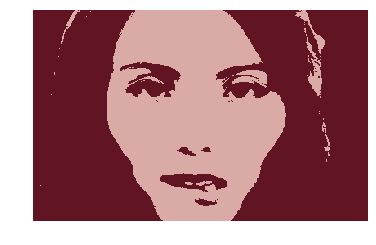

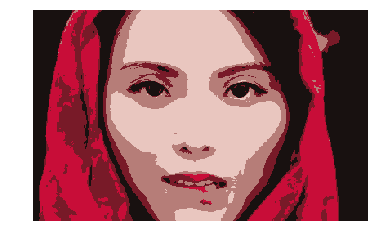

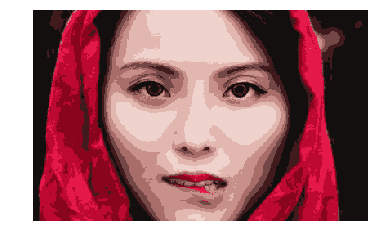

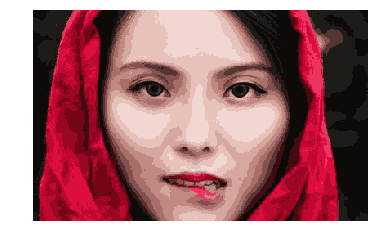

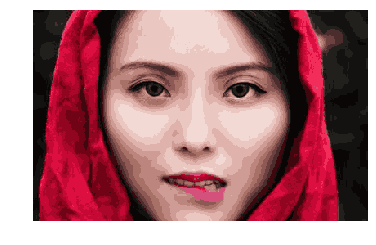

In [29]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    
    img4 = np.zeros_like(X)
    #replace each pixel by it center
    for k in range(K):
        img4[label== k] = kmeans.cluster_centers_[k]
        
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()